In [24]:
import requests
from bs4 import BeautifulSoup

* https://www.lumberjack.com/it/sport_shoes?gender=woman
* https://www.lumberjack.com/it/sandals?gender=woman
* https://www.lumberjack.com/it/boat-shoes?gender=woman
* https://www.lumberjack.com/it/ankle-boots?gender=woman
* https://www.lumberjack.com/it/beatles?gender=woman
* https://www.lumberjack.com/it/outdoor?gender=woman

In [25]:
nomi=[]
prezzi=[]
modello=[]
marca=[]

#modello=['Sneakers','Sandali','Stivali e stivaletti','Scarpe basse']
#pagine=["https://www.lumberjack.com/it/sport_shoes?gender=woman"]#,
       # "https://www.lumberjack.com/it/sandals?gender=woman",
        #"https://www.lumberjack.com/it/ankle-boots?gender=woman",
        #"https://www.lumberjack.com/it/outdoor?gender=woman"]

In [26]:
# Sneakers
urlpagine="https://www.lumberjack.com/it/sport_shoes?gender=woman"
page_numbers='&page='
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
pagine_totali_presenti=int(soup.find_all("a",class_="page-link")[-2].text)
i=1 
while i<=pagine_totali_presenti:
    req=requests.get(urlpagine+page_numbers+str(i))
    soup= BeautifulSoup(req.text)
    nomi_scarpe=soup.find_all("div", class_="product__name")
    for nome in nomi_scarpe:
        nomi.append(nome.text.strip())
        prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
    for p in prezzi_soup:
        p=p.text.strip()
        p=p.replace("\xa0EUR", "")
        p=p.replace(",",".")
        p=float(p)
        prezzi.append(p)
        marca.append("Lumberjack")
        modello.append("Sneakers")               
    i+=1     

In [27]:
# Sandali
urlpagine="https://www.lumberjack.com/it/sandals?gender=woman"
page_numbers='&page='
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
pagine_totali_presenti=int(soup.find_all("a",class_="page-link")[-2].text)
i=1 
while i<=pagine_totali_presenti:
    req=requests.get(urlpagine+page_numbers+str(i))
    soup= BeautifulSoup(req.text)
    nomi_scarpe=soup.find_all("div", class_="product__name")
    for nome in nomi_scarpe:
        nomi.append(nome.text.strip())
        prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
    for p in prezzi_soup:
        p=p.text.strip()
        p=p.replace("\xa0EUR", "")
        p=p.replace(",",".")
        p=float(p)
        prezzi.append(p)
        marca.append("Lumberjack")
        modello.append("Sandali")               
    i+=1    

In [28]:
# Scarpe basse
urlpagine="https://www.lumberjack.com/it/ankle-boots?gender=woman"
page_numbers='&page='
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
pagine_totali_presenti=int(soup.find_all("a",class_="page-link")[-2].text)
i=1 
while i<=pagine_totali_presenti:
    req=requests.get(urlpagine+page_numbers+str(i))
    soup= BeautifulSoup(req.text)
    nomi_scarpe=soup.find_all("div", class_="product__name")
    for nome in nomi_scarpe:
        nomi.append(nome.text.strip())
        prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
    for p in prezzi_soup:
        p=p.text.strip()
        p=p.replace("\xa0EUR", "")
        p=p.replace(",",".")
        p=float(p)
        prezzi.append(p)
        marca.append("Lumberjack")
        modello.append("Scarpe basse")               
    i+=1   

In [29]:
# Stivali e stivaletti
urlpagine="https://www.lumberjack.com/it/outdoor?gender=woman"
req=requests.get(urlpagine)
soup=BeautifulSoup(req.text)
nomi_scarpe=soup.find_all("div", class_="product__name")
for nome in nomi_scarpe:
    nomi.append(nome.text.strip())
    prezzi_soup=soup.find_all ("span", class_="product__prices-sale")
for p in prezzi_soup:
    p=p.text.strip()
    p=p.replace("\xa0EUR", "")
    p=p.replace(",",".")
    p=float(p)
    prezzi.append(p)
    marca.append("Lumberjack")              
    modello.append("Stivali e stivaletti")       

In [30]:
len(nomi)

228

In [31]:
len(prezzi)

228

In [32]:
len(marca)

228

In [33]:
len(modello)

228

In [34]:
import pandas as pd
Lumberjack={
    "marca":marca,
    "modello":modello,
    "name":nomi,
    "prezzi":prezzi,
}
dfl=pd.DataFrame(Lumberjack)
dfl # è IL DATABASE DEFINITITO DI LUMBERJACK

,marca,modello,name,prezzi
0,Lumberjack,Sneakers,FREYA SNEAKERS DONNA,49.99
1,Lumberjack,Sneakers,FREYA SNEAKERS DONNA,49.99
2,Lumberjack,Sneakers,CECILIA SNEAKERS DONNA,69.99
3,Lumberjack,Sneakers,DORIS SNEAKER DONNA,59.99
4,Lumberjack,Sneakers,HILDA SNEAKER DONNA,89.99
...,...,...,...,...
223,Lumberjack,Stivali e stivaletti,ELECTRIC SCARPE OUTDOOR DONNA,34.99
224,Lumberjack,Stivali e stivaletti,VABORY OUTDOOR DONNA,59.99
225,Lumberjack,Stivali e stivaletti,STOWE Scarponcino outdoor Donna,34.99
226,Lumberjack,Stivali e stivaletti,MODESTA OUTDOOR DONNA,39.99


In [36]:
dflg=dfl.groupby("modello")

In [37]:
dflg.modello.count()

modello
Sandali                  59
Scarpe basse             34
Sneakers                123
Stivali e stivaletti     12
Name: modello, dtype: int64

* i modelli offerti dal competitor Kammi sono 16 per tipologia, però sono in maggior numero.
* 
**Si potrebbe pensare di sviluppare altre line di prodotto non gestite tipo:Scarpe con tacco e Zeppe**

In [79]:
dflg_prezzi = dflg.prezzi.describe()
dflg_prezzi_mean = dflg_prezzi.loc[:,"mean"]

* i prezzi in media sono più bassi per ogni tipologia di prodotto

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='count', ylabel='modello'>

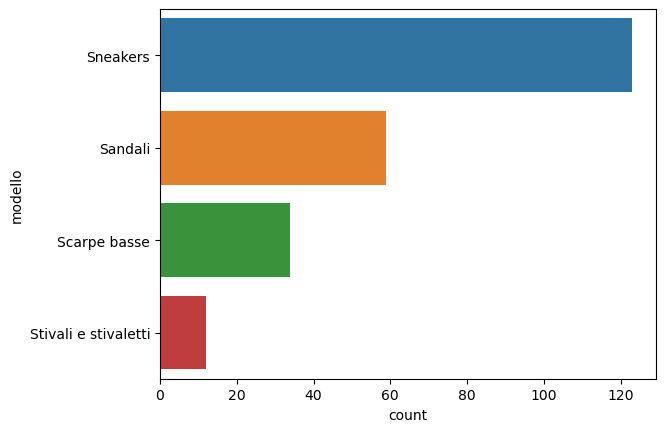

In [89]:
sns.countplot(data=dfl, y="modello") #vedo le quantità per ogni tipo di modello di scarpe

Si denota una maggiore produzione di sneaker, a confronto con il competitor che invece ha una produzione equa dei diversi modelli di scarpa

<Axes: ylabel='modello'>

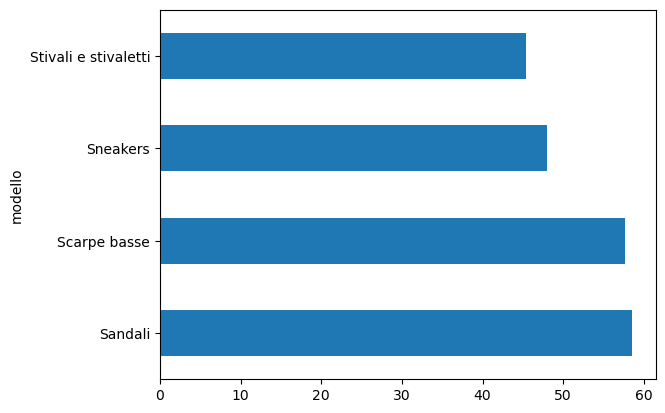

In [85]:
dflg_prezzi_mean.plot(kind="barh", x="mean")

<Axes: xlabel='modello', ylabel='mean'>

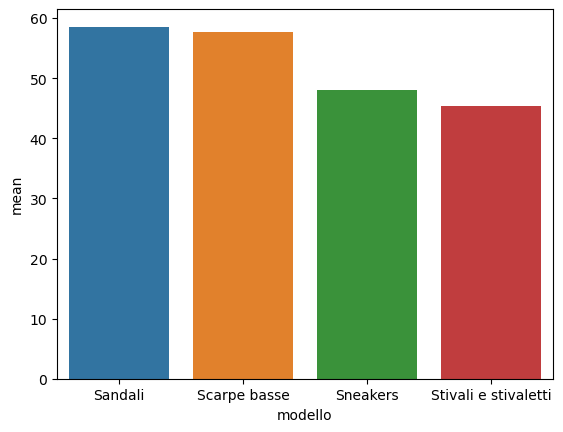

In [94]:
sns.barplot(x=dflg_prezzi_mean.index, y=dflg_prezzi_mean)

In [91]:
dflg_prezzi_mean

modello
Sandali                 58.566271
Scarpe basse            57.637059
Sneakers                48.030650
Stivali e stivaletti    45.406667
Name: mean, dtype: float64